In [1]:
import sys
import os
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath('./introduction.ipynb'))))

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(2022)

n = 5000

# Initialize exogenous variables; normal errors, uniformly distributed covariates and instruments
e = np.random.normal(size=(n,)) / 5
x = np.random.uniform(low=0.0, high=10.0, size=(n,))
z = np.random.uniform(low=0.0, high=10.0, size=(n,))

# Initialize treatment variable
# t = np.sqrt((x + 2) * z) + e
t = np.sqrt(2 * z + x * z + x * x + x) + e
# Show the marginal distribution of t


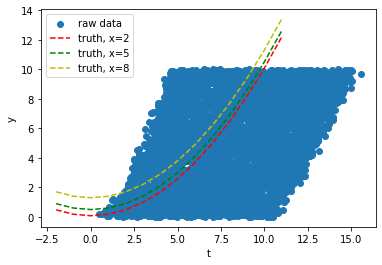

In [4]:
y = t*t / 10 +  x * x / 50 + e

# The endogeneity problem is clear, the latent error enters both treatment and outcome equally
plt.scatter(t,z, label ='raw data')
tticks = np.arange(-2,12)
yticks2 = tticks*tticks/10 + 0.08
yticks5 = tticks*tticks/10 + 0.5
yticks8 = tticks*tticks/10  + 1.3
plt.plot(tticks,yticks2, 'r--', label = 'truth, x=2')
plt.plot(tticks,yticks5, 'g--', label = 'truth, x=5')
plt.plot(tticks,yticks8, 'y--', label = 'truth, x=8')
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.show()

In [5]:
import pandas as pd
data_dict = {
    'z': z,
    'w': x,
    'x': t,
    'y': y
}
data = pd.DataFrame(data_dict)
data.head()

,z,w,x,y
0,5.671995,1.768527,5.125446,2.689468
1,9.485405,3.200217,7.867631,6.339809
2,2.241610,0.230992,2.271135,0.489015
3,5.771337,1.093724,4.885242,2.807421
4,8.596682,6.167256,10.752851,12.379504


In [6]:
from ylearn.estimator_model.iv import NP2SLS

In [7]:
iv = NP2SLS()
iv.fit(
    data=data,
    outcome='y',
    treatment='x',
    instrument='z',
    covariate='w',
    covar_basis=('Poly', 2),
    treatment_basis=('Poly', 2),
    instrument_basis=('Poly', 1),    
)

NP2SLS(x_model=LinearRegression(), y_model=LinearRegression())

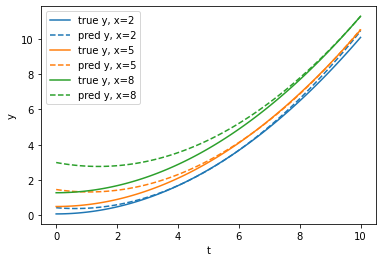

In [8]:
n_test = 500
for i, x in enumerate([2, 5, 8]):
    t = np.linspace(0,10,num = 100)
    # y_true = t*t / 10 - x*t/10
    y_true = t * t / 10 + x * x / 50

    test_data = pd.DataFrame(
        {'x': t,
         'w': np.full_like(t, x),}
    )
    y_pred = iv.estimate(data=test_data, quantity='CF')
    plt.plot(t, y_true, label='true y, x={0}'.format(x),color='C'+str(i))
    plt.plot(t, y_pred, label='pred y, x={0}'.format(x),color='C'+str(i),ls='--')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()

Test for the special case: 2SLS

In [9]:
n = 5000

# Initialize exogenous variables; normal errors, uniformly distributed covariates and instruments
e = np.random.normal(size=(n,))
x = np.random.uniform(low=0.0, high=10.0, size=(n,)) + e
z = np.random.uniform(low=0.0, high=10.0, size=(n,))

# Initialize treatment variable
# t = np.sqrt((x + 2) * z) + e
t = x * z + e + z
y = t * x / 2 +  x / 5 + e

data_dict = {
    'z': z,
    'w': x,
    'x': t,
    'y': y
}
data = pd.DataFrame(data_dict)
data.head()

,z,w,x,y
0,5.671995,1.767999,15.699550,14.231467
1,9.485405,2.925315,36.958306,54.367511
2,2.241610,0.091706,2.307895,-0.015120
3,5.771337,3.078410,25.522564,41.884823
4,8.596682,6.449365,64.321932,208.989798


In [10]:
iv1 = NP2SLS()
iv1.fit(
    data=data,
    outcome='y',
    treatment='x',
    instrument='z',
    covariate='w',
    covar_basis=('Poly', 1),
    treatment_basis=('Poly', 1),
    instrument_basis=('Poly', 1),    
)

NP2SLS(x_model=LinearRegression(), y_model=LinearRegression())

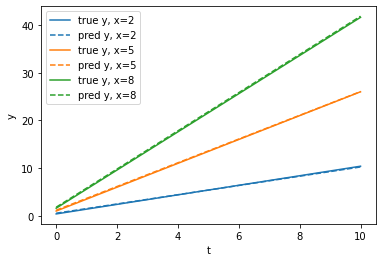

In [11]:
n_test = 500
for i, x in enumerate([2, 5, 8]):
    t = np.linspace(0,10,num = 100)
    # y_true = t*t / 10 - x*t/10
    # y_true = t * t / 10 + x * x / 50
    y_true = t * x / 2 +  x / 5

    
    test_data = pd.DataFrame(
        {'x': t,
         'w': np.full_like(t, x),}
    )
    y_pred = iv1.estimate(data=test_data, quantity='CF')
    plt.plot(t, y_true, label='true y, x={0}'.format(x),color='C'+str(i))
    plt.plot(t, y_pred, label='pred y, x={0}'.format(x),color='C'+str(i),ls='--')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()

### We compare the IV results in last section to results of naive LinearRegression to indicate the effetiveness of IV.

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
n = 5000

# Initialize exogenous variables; normal errors, uniformly distributed covariates and instruments
e = np.random.normal(size=(n,))
# x = np.random.uniform(low=0.0, high=10.0, size=(n,))
z = np.random.uniform(low=0.0, high=10.0, size=(n,))

# Initialize treatment variable
# t = np.sqrt((x + 2) * z) + e

In [14]:
x = np.ones((n, )) * 2 + e
t = (x * z + e + z)
y = t * x / 2 +  x / 5 + e

l2 = LinearRegression()
l2.fit(t.reshape(-1, 1), y.squeeze())

LinearRegression()

In [15]:
x = np.ones((n, )) * 5 + e
t = (x * z + e + z)
y = (t * x / 2 +  x / 5 + e)

l5 = LinearRegression()
l5.fit(t.reshape(-1, 1), y.squeeze())

LinearRegression()

In [16]:
x = np.ones((n, )) * 8 + e
t = (x * z + e + z)
y = t * x / 2 +  x / 5 + e

l8 = LinearRegression()
l8.fit(t.reshape(-1, 1), y.squeeze())

LinearRegression()

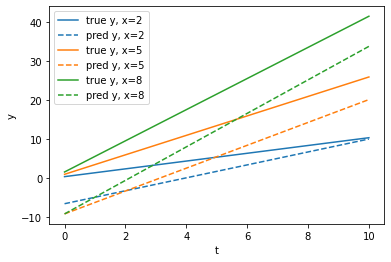

In [17]:
n_test = 500
model = [l2, l5, l8]
for i, x in enumerate([2, 5, 8]):
    t = np.linspace(0,10,num = 100)
    # y_true = t*t / 10 - x*t/10
    # y_true = t * t / 10 + x * x / 50
    x_ = np.full_like(t, x)
    y_true = t * x_ / 2 +  x_ / 5

    y_pred = model[i].predict(t.reshape(-1, 1))
    plt.plot(t, y_true, label='true y, x={0}'.format(x),color='C'+str(i))
    plt.plot(t, y_pred, label='pred y, x={0}'.format(x),color='C'+str(i),ls='--')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()